> If you went through some of the exercises in the previous chapters, you may have been surprised by how much you can get done without knowing anything about what’s under the hood.

> However, having a good understanding of how things work can help you quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task. Understanding what’s under the hood will also help you debug issues and perform error analysis more efficiently.

In [1]:
import numpy as np
import pandas as pd
import sklearn
sklearn.__version__

'0.20.1'

# Linear Regression

## The Normal Equation

![](http://upload.ouliu.net/i/201901141428571t24n.png)

In [6]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

X_b = np.c_[np.ones(shape=(100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.06489854],
       [3.17765432]])

In [10]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones(shape=(2,1)),X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.06489854],
       [10.42020718]])

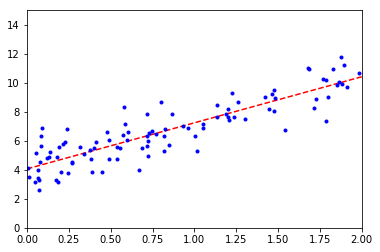

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_new,y_pred,'r--')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [14]:
#using Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.06489854],
       [10.42020718]])

### Computational Complexity
> The Normal Equation computes the inverse of XT · X, which is an n × n matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n2.4) to O(n3) (depending on the implementation). In other words, if you double the number of features, you multiply the computation time by roughly 2^2.4 = 5.3 to 2^3 = 8.

## Gradient Descent
> An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

💡When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

## Batch Gradient Descent

In [16]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients

In [17]:
theta

array([[4.06489854],
       [3.17765432]])

`Strategy of iterations setting`

💡A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny — that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance) — because this happens when Gradient Descent has (almost) reached the minimum.

## Stochastic Gradient Descent
> randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule.

In [20]:
n_epochs = 50
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients

In [21]:
theta

array([[4.01054539],
       [3.25521108]])

`using ScikitLearn`

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [27]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.03641043]), array([3.14938403]))

## Mini-batch Gradient Descent

![](http://upload.ouliu.net/i/20190114160539iheyk.png)

## Polynomial Regression

In [5]:
#quadratic equation
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

d:\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


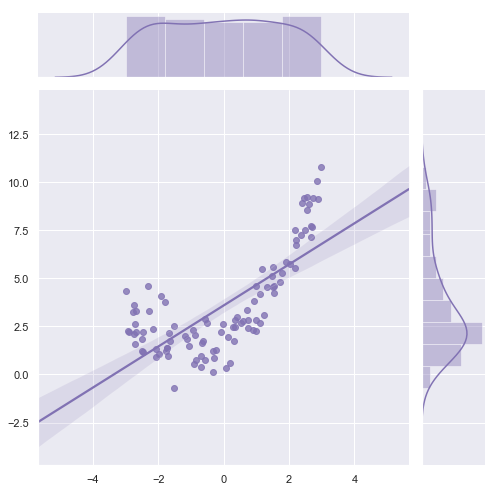

In [10]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.jointplot(X, y, kind="reg", color="m", height=7)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-0.854536]
[-0.854536    0.73023178]


In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.84636367]), array([[1.11122453, 0.53683412]]))

> Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do).

## Learning Curves
> If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting.

> Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size. To generate the plots, simply train the model several times on different sized subsets of the training set.

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_pred,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_pred,y_val))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')

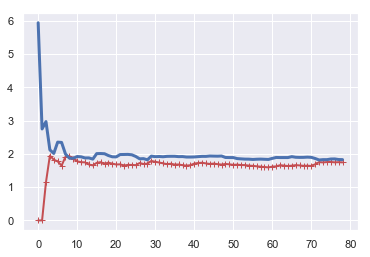

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

> These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.

> If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

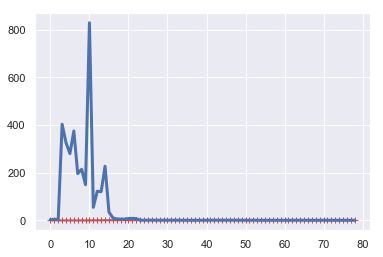

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, X, y)

> One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

`THE BIAS/VARIANCE TRADEOFF`
- Bias:This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.10
- Variance: This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.
- Irreducible error:This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data

# Regularized Linear Models

## Ridge Regression `Tikhonov regularization`
> Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

💡It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

In [31]:
print(y.shape)
print(y.ravel().shape)

(100, 1)
(100,)


`Perform Ridge Regression with Scikit-Learn using a closed-form solution (a variant of Equation 4-9 using a matrix factorization technique by André-Louis Cholesky):`

In [32]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.19266572]])

`Using Stochastic Gradient Descent`

In [33]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

d:\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.27774881])

## Lasso Regression

> An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.19266572]])

In [35]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

d:\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.27768108])

## Elastic Net

In [51]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.14970081])

## Early Stopping
> A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum.

In [ ]:
from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1,warm_start=True,
                       penalty=None,learning_rate='constant',eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict,y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# Logistic Regression

In [52]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [53]:
X = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int)

In [54]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

d:\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

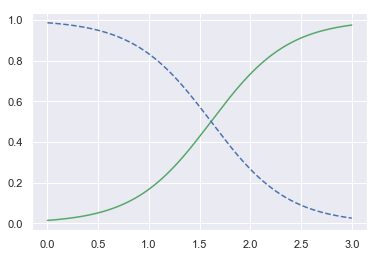

In [55]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Iris Virginica')

In [56]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

> The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.